# Dynamics of Cylindrical Electromagnetic Universes by M.A. Melvin
##  Geoff Cope
##  Univeristy of Utah
##  January 2, 2022

https://journals.aps.org/pr/abstract/10.1103/PhysRev.139.B225

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
rho,zeta,phi,tau,drho,dzeta,dphi,dtau = symbols( 'rho zeta phi tau drho dzeta dphi dtau' ) 

In [4]:
gamma = Function('gamma')(rho,tau)
gamma

In [5]:
psi = Function('psi')(rho,tau)
psi

In [6]:
variables = Matrix( [rho,zeta,phi,tau] )
variables

⎡ρ⎤
⎢ ⎥
⎢ζ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣τ⎦

In [7]:
differentials = Matrix( [drho,dzeta,dphi,dtau] )
differentials

⎡drho ⎤
⎢     ⎥
⎢dzeta⎥
⎢     ⎥
⎢dphi ⎥
⎢     ⎥
⎣dtau ⎦

In [8]:
lineElement = expand(exp(2*(gamma-psi)) * (dtau**2 - drho**2) - exp(2*psi) * dzeta**2 - rho**2 * exp(-2*psi) *dphi**2)
lineElement

In [9]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅γ(ρ, τ)  -2⋅ψ(ρ, τ)                                                      ⎤
⎢-ℯ         ⋅ℯ                 0              0                   0           ⎥
⎢                                                                             ⎥
⎢                           2⋅ψ(ρ, τ)                                         ⎥
⎢           0             -ℯ                  0                   0           ⎥
⎢                                                                             ⎥
⎢                                        2  -2⋅ψ(ρ, τ)                        ⎥
⎢           0                  0       -ρ ⋅ℯ                      0           ⎥
⎢                                                                             ⎥
⎢                                                        2⋅γ(ρ, τ)  -2⋅ψ(ρ, τ)⎥
⎣           0                  0              0         ℯ         ⋅ℯ          ⎦

In [10]:
import sympy

In [11]:
m = sympy.Array(g)
m

⎡  2⋅γ(ρ, τ)  -2⋅ψ(ρ, τ)                                                      ⎤
⎢-ℯ         ⋅ℯ                 0              0                   0           ⎥
⎢                                                                             ⎥
⎢                           2⋅ψ(ρ, τ)                                         ⎥
⎢           0             -ℯ                  0                   0           ⎥
⎢                                                                             ⎥
⎢                                        2  -2⋅ψ(ρ, τ)                        ⎥
⎢           0                  0       -ρ ⋅ℯ                      0           ⎥
⎢                                                                             ⎥
⎢                                                        2⋅γ(ρ, τ)  -2⋅ψ(ρ, τ)⎥
⎣           0                  0              0         ℯ         ⋅ℯ          ⎦

In [12]:
from einsteinpy.symbolic import *

In [13]:
syms = sympy.symbols("rho zeta phi tau")
rho,zeta,phi,tau = syms

In [14]:
metric = MetricTensor(m,syms)

In [15]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂             ∂                                                                                     ∂             ∂          ⎤        
⎢⎢──(γ(ρ, τ)) - ──(ψ(ρ, τ))                   0                                    0                  ──(γ(ρ, τ)) - ──(ψ(ρ, τ))⎥  ⎡     
⎢⎢∂ρ            ∂ρ                                                                                    ∂τ            ∂τ         ⎥  ⎢     
⎢⎢                                                                                                                             ⎥  ⎢     
⎢⎢                             -2⋅γ(ρ, τ) + 4⋅ψ(ρ, τ) ∂                                                                        ⎥  ⎢     
⎢⎢            0              -ℯ                      ⋅──(ψ(ρ, τ))                  0                              0            ⎥  ⎢∂    
⎢⎢                                                    ∂ρ                                                                       ⎥  ⎢──(ψ(
⎢⎢                                       

In [16]:
Ric = RicciTensor.from_metric(metric)
simplify(Ric.tensor())

⎡    ⎛  2              2                           2     2              2         ⎞                                                     
⎢    ⎜ ∂              ∂               ⎛∂          ⎞     ∂              ∂          ⎟   ∂             ∂                                   
⎢- ρ⋅⎜───(γ(ρ, τ)) - ───(γ(ρ, τ)) + 2⋅⎜──(ψ(ρ, τ))⎟  - ───(ψ(ρ, τ)) + ───(ψ(ρ, τ))⎟ + ──(γ(ρ, τ)) + ──(ψ(ρ, τ))                         
⎢    ⎜  2              2              ⎝∂ρ         ⎠      2              2         ⎟   ∂ρ            ∂ρ                                  
⎢    ⎝∂ρ             ∂τ                                ∂ρ             ∂τ          ⎠                                                     
⎢──────────────────────────────────────────────────────────────────────────────────────────────────────────────                         
⎢                                                      ρ                                                                                
⎢                                        

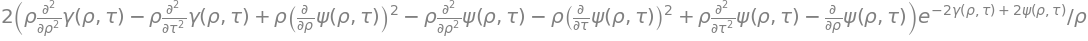

In [17]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [18]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡  ⎛    2              2                           2     2              2         ⎞                                   ⎛    2            
⎢  ⎜   ∂              ∂               ⎛∂          ⎞     ∂              ∂          ⎟   ∂             ∂                 ⎜   ∂             
⎢ρ⋅⎜- ───(γ(ρ, τ)) + ───(γ(ρ, τ)) - 2⋅⎜──(ψ(ρ, τ))⎟  + ───(ψ(ρ, τ)) - ───(ψ(ρ, τ))⎟ + ──(γ(ρ, τ)) + ──(ψ(ρ, τ))   1.0⋅⎜ρ⋅───(γ(ρ, τ)) - 
⎢  ⎜    2              2              ⎝∂ρ         ⎠      2              2         ⎟   ∂ρ            ∂ρ                ⎜    2            
⎢  ⎝  ∂ρ             ∂τ                                ∂ρ             ∂τ          ⎠                                   ⎝  ∂ρ             
⎢────────────────────────────────────────────────────────────────────────────────────────────────────────────── + ──────────────────────
⎢                                                      ρ                                                                                
⎢                                        

In [ ]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [ ]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [19]:
einsteinSimplifed = simplify(einst.tensor()) 
einsteinSimplifed

⎡                                        ∂                                                                                              
⎢               2                2   1.0⋅──(γ(ρ, τ))                                                                                    
⎢  ⎛∂          ⎞    ⎛∂          ⎞        ∂ρ                                                                                             
⎢- ⎜──(ψ(ρ, τ))⎟  - ⎜──(ψ(ρ, τ))⎟  + ───────────────                                                                                   0
⎢  ⎝∂ρ         ⎠    ⎝∂τ         ⎠           ρ                                                                                           
⎢                                                                                                                                       
⎢                                                     ⎛        2                2                               2           2           
⎢                                        

In [20]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡    ⎛  2              2                           2     2              2         ⎞                                                     
⎢    ⎜ ∂              ∂               ⎛∂          ⎞     ∂              ∂          ⎟   ∂             ∂                                   
⎢- ρ⋅⎜───(γ(ρ, τ)) - ───(γ(ρ, τ)) + 2⋅⎜──(ψ(ρ, τ))⎟  - ───(ψ(ρ, τ)) + ───(ψ(ρ, τ))⎟ + ──(γ(ρ, τ)) + ──(ψ(ρ, τ))                         
⎢    ⎜  2              2              ⎝∂ρ         ⎠      2              2         ⎟   ∂ρ            ∂ρ                                  
⎢    ⎝∂ρ             ∂τ                                ∂ρ             ∂τ          ⎠                                                     
⎢──────────────────────────────────────────────────────────────────────────────────────────────────────────────                         
⎢                                                      ρ                                                                                
⎢                                        

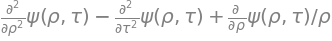

In [32]:
equation14 = expand((-1/rho)*ricciSimplified[1,1].args[1])
equation14

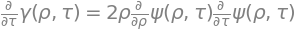

In [30]:
equation15c = Eq( diff(gamma,tau) , solve( einsteinSimplifed[0,3] , diff(gamma,tau) )[0] ) 
equation15c

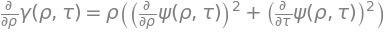

In [31]:
equation15d = Eq( diff(gamma,rho) , solve( einsteinSimplifed[0,0] , diff(gamma,rho) )[0] ) 
equation15d

In [34]:
vacuumFieldEquations = Matrix([equation14,equation15c,equation15d])
vacuumFieldEquations

⎡                                  ∂              ⎤
⎢      2              2            ──(ψ(ρ, τ))    ⎥
⎢     ∂              ∂             ∂ρ             ⎥
⎢    ───(ψ(ρ, τ)) - ───(ψ(ρ, τ)) + ───────────    ⎥
⎢      2              2                 ρ         ⎥
⎢    ∂ρ             ∂τ                            ⎥
⎢                                                 ⎥
⎢    ∂                 ∂           ∂              ⎥
⎢    ──(γ(ρ, τ)) = 2⋅ρ⋅──(ψ(ρ, τ))⋅──(ψ(ρ, τ))    ⎥
⎢    ∂τ                ∂ρ          ∂τ             ⎥
⎢                                                 ⎥
⎢                ⎛             2                2⎞⎥
⎢∂               ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟⎥
⎢──(γ(ρ, τ)) = ρ⋅⎜⎜──(ψ(ρ, τ))⎟  + ⎜──(ψ(ρ, τ))⎟ ⎟⎥
⎣∂ρ              ⎝⎝∂ρ         ⎠    ⎝∂τ         ⎠ ⎠⎦